# Setup

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, clear_output

In [2]:
%config Completer.use_jedi = False

In [3]:
sns.set()

In [4]:
pd.set_option('display.max_columns', 30)

In [5]:
def load_preprocess_df(drop_missing=False):
#     df = pd.read_csv('stroke_det_cat.csv')
#     df.drop(columns='bmi_range', inplace=True)
    
    df = pd.read_csv('healthcare-dataset-stroke-data.csv')
    df.drop(columns='id', inplace=True)
    
    if drop_missing:
        df = df.dropna().reset_index(drop=True)
    
    cats = list(df.select_dtypes(include=['object', 'category']).columns)
    nums = list(df.select_dtypes(exclude=['object', 'category']).columns)
    
    features_to_conv = ['hypertension', 'heart_disease', 'stroke']
    cats.extend(features_to_conv)
    for feature in features_to_conv:
        if feature in nums:
            nums.remove(feature)
    print(f'Categorical variables:  {cats}')
    print(f'Numerical variables:  {nums}')
    
    df = df.astype({i: 'object' for i in cats})
    df = df.astype({i: 'int64' for i in features_to_conv})
    
    df = pd.concat([df[cats], df[nums]], axis=1)
    return df

In [6]:
df = load_preprocess_df(drop_missing=False)
df.head()

Categorical variables:  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']
Numerical variables:  ['age', 'avg_glucose_level', 'bmi']


,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi
0,Male,Yes,Private,Urban,formerly smoked,0,1,1,67.0,228.69,36.6
1,Female,Yes,Self-employed,Rural,never smoked,0,0,1,61.0,202.21,NaN
2,Male,Yes,Private,Rural,never smoked,0,1,1,80.0,105.92,32.5
3,Female,Yes,Private,Urban,smokes,0,0,1,49.0,171.23,34.4
4,Female,Yes,Self-employed,Rural,never smoked,1,0,1,79.0,174.12,24.0


In [7]:
df.dtypes

gender                object
ever_married          object
work_type             object
Residence_type        object
smoking_status        object
hypertension           int64
heart_disease          int64
stroke                 int64
age                  float64
avg_glucose_level    float64
bmi                  float64
dtype: object

In [8]:
cats = list(df.select_dtypes(exclude=['float64']).columns)
nums = list(df.select_dtypes(include=['float64']).columns)
print(f'Categorical variables:  {cats}')
print(f'Numerical variables:  {nums}')

Categorical variables:  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']
Numerical variables:  ['age', 'avg_glucose_level', 'bmi']


In [9]:
# Check for the number of unique values in each column
pd.DataFrame([df.nunique(), df.dtypes], index=['nunique', 'dtype'])

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi
nunique,3,2,5,2,4,2,2,2,104,3979,418
dtype,object,object,object,object,object,int64,int64,int64,float64,float64,float64


In [10]:
for col in cats:
    print(df[col].value_counts())
    print()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Yes    3353
No     1757
Name: ever_married, dtype: int64

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

0    4612
1     498
Name: hypertension, dtype: int64

0    4834
1     276
Name: heart_disease, dtype: int64

0    4861
1     249
Name: stroke, dtype: int64



In [11]:
df = df.drop(df[df['gender'] == 'Other'].index).reset_index(drop=True)
df.shape

(5109, 11)

In [12]:
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [13]:
# Nothing useful for predicting stroke, consider joining with `children` category
df.loc[df['work_type'] == 'Never_worked']

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi
253,Male,No,Never_worked,Rural,Unknown,0,0,0,14.0,161.28,19.1
603,Male,No,Never_worked,Urban,never smoked,0,0,0,23.0,125.26,18.7
886,Female,No,Never_worked,Urban,never smoked,0,0,0,19.0,86.96,25.8
939,Male,No,Never_worked,Rural,Unknown,0,0,0,13.0,111.48,20.8
959,Male,No,Never_worked,Urban,never smoked,0,0,0,17.0,113.25,23.4
1462,Male,No,Never_worked,Rural,Unknown,0,0,0,17.0,61.01,32.5
1789,Female,No,Never_worked,Urban,never smoked,0,0,0,13.0,70.93,22.9
1922,Male,No,Never_worked,Urban,never smoked,0,0,0,16.0,59.99,28.2
2346,Female,No,Never_worked,Urban,never smoked,0,0,0,14.0,148.37,22.7
2721,Female,No,Never_worked,Rural,never smoked,0,0,0,17.0,88.57,31.1


In [14]:
df.work_type.replace('children', 'Never_worked', inplace=True)

In [15]:
df.work_type.value_counts()

Private          2924
Self-employed     819
Never_worked      709
Govt_job          657
Name: work_type, dtype: int64

In [16]:
df.shape

(5109, 11)

# Preprocessing

## Missing BMI values

In [17]:
df_copy = df.copy()

In [18]:
missing_df = df_copy[df_copy.isna().any(axis=1)]
missing_df.head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi
1,Female,Yes,Self-employed,Rural,never smoked,0,0,1,61.0,202.21,NaN
8,Female,Yes,Private,Rural,Unknown,0,0,1,59.0,76.15,NaN
13,Male,Yes,Private,Urban,Unknown,0,1,1,78.0,219.84,NaN
19,Male,No,Govt_job,Urban,Unknown,0,1,1,57.0,217.08,NaN
27,Male,Yes,Private,Rural,Unknown,0,0,1,58.0,189.84,NaN


In [19]:
missing_df['stroke'].value_counts()

0    161
1     40
Name: stroke, dtype: int64

In [20]:
df.stroke.value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [21]:
len(missing_df[missing_df.stroke == 1]) / len(df[df.stroke == 1])

0.1606425702811245

- Out of all the missing BMI values, the percentage of data that accounts for stroke sufferers is a whopping **16%**. Therefore, this has to be dealt with appropriately.

### Imputing missing BMI values using a regressor

- **NOTE**: The results seem to be not better than using KNN imputer. Therefore, not using this later.

In [22]:
# A really fantastic and intelligent way to deal with blanks, 
# from Thoman Konstantin in: 
# https://www.kaggle.com/thomaskonstantin/analyzing-and-modeling-stroke-data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

DT_bmi_pipe = Pipeline(steps=[
                              ('scale',StandardScaler()),
                              ('lr',DecisionTreeRegressor(random_state=42))
                             ])
X = df_copy[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
# print(X.gender.value_counts())

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),
                          index=Missing.index)
df_copy.loc[Missing.index,'bmi'] = predicted_bmi

In [23]:
df_copy.loc[missing_df.index].head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi
1,Female,Yes,Self-employed,Rural,never smoked,0,0,1,61.0,202.21,29.879487
8,Female,Yes,Private,Rural,Unknown,0,0,1,59.0,76.15,30.556098
13,Male,Yes,Private,Urban,Unknown,0,1,1,78.0,219.84,27.247222
19,Male,No,Govt_job,Urban,Unknown,0,1,1,57.0,217.08,30.841860
27,Male,Yes,Private,Rural,Unknown,0,0,1,58.0,189.84,33.146667


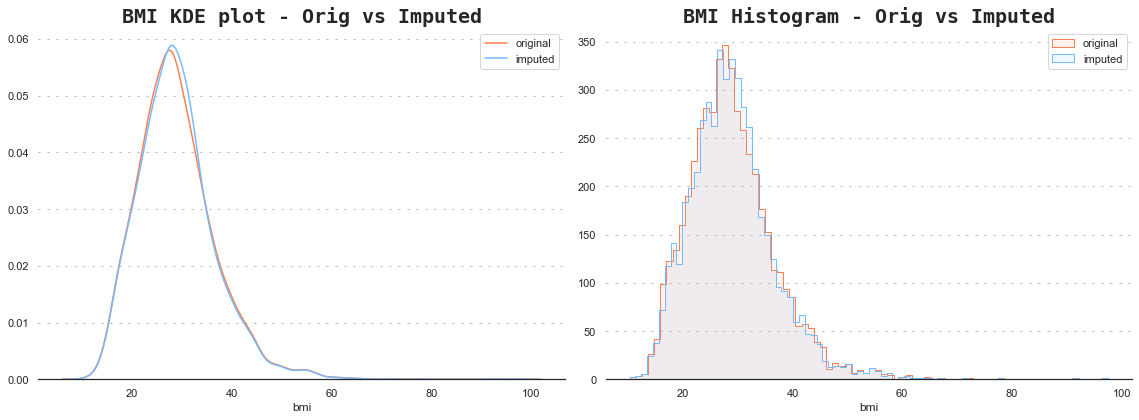

In [24]:
fig = plt.figure(figsize=(16, 6), facecolor='white')
sns.set_style('white')
gs=fig.add_gridspec(1,2)

ax = [None, None]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

sns.kdeplot(data=df, x='bmi', ax=ax[0], color='coral', zorder=2)
sns.kdeplot(data=df_copy, x='bmi', ax=ax[0], color='xkcd:sky blue', zorder=2)
ax[0].set_title('BMI KDE plot - Orig vs Imputed', fontsize=20,fontweight='bold', fontfamily='monospace')

sns.histplot(data=df, x='bmi', ax=ax[1], element='step', color='coral', alpha=0.1)
sns.histplot(data=df_copy, x='bmi', ax=ax[1], element='step', color='xkcd:sky blue', alpha=0.1)
ax[1].set_title('BMI Histogram - Orig vs Imputed', fontsize=20,fontweight='bold', fontfamily='monospace')

for ax_ in ax:
    ax_.legend(['original', 'imputed'])
    ax_.set_ylabel(None)
    ax_.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7), alpha=0.3)
    for direction in ['top','right','left']:
        ax_.spines[direction].set_visible(False)

# sns.despine(left=True)
plt.tight_layout()
plt.show()

## Splitting Dataset

In [25]:
df_copy = df.copy()

In [26]:
from sklearn.model_selection import train_test_split

def train_validation_test_split(
    X, y, train_size=0.8, val_size=None, test_size=None,
    stratify=None, random_state=42, shuffle=True
):
    if not val_size:
        val_size = (1 - train_size) / 2.
        test_size = val_size
        
    assert int(train_size + val_size + test_size + 1e-7) == 1
    
    stratify_1 = y if stratify else None
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, stratify=stratify_1, 
        random_state=random_state, shuffle=shuffle)
    
    stratify_2 = y_train_val if stratify else None
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
        random_state=random_state, stratify=stratify_2, shuffle=shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [27]:
# After spending some time trying to make this function work,
#  I realized that train_test_split already has a `stratify` parameter that serves the same purpose...
# So this function is actually not needed.

from sklearn.model_selection import StratifiedShuffleSplit

def stratified_split(
    X, y, train_size=0.8, val_size=None, test_size=None, 
    random_state=42, shuffle=True
):
    if not val_size:
        # print("[INFO] Validation size and test size are inferred from train_size!")
        val_size = (1 - train_size) / 2.
        test_size = val_size
    elif not test_size:
        test_size = train_size - val_size
        
    assert int(train_size + val_size + test_size + 1e-7) == 1
    
    split = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)
    for train_val_index, test_index in split.split(X, y):
        X_train_val = X.loc[train_val_index]
        X_test = X.loc[test_index]
        y_train_val = y.loc[train_val_index]
        y_test = y.loc[test_index]
    
    # Must reset the index for the DataFrame to locate the proper indices from the splits
    X_train_val.reset_index(drop=True, inplace=True)
    y_train_val.reset_index(drop=True, inplace=True)
    
    split = StratifiedShuffleSplit(n_splits=1, 
                                   test_size=val_size/(train_size+val_size), 
                                   random_state=42)
    for train_index, val_index in split.split(X_train_val, y_train_val):
        X_train = X_train_val.loc[train_index]
        X_val = X_train_val.loc[val_index]
        y_train = y_train_val.loc[train_index]
        y_val = y_train_val.loc[val_index]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

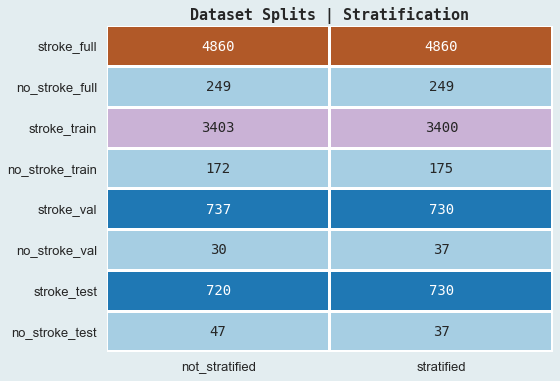

In [28]:
from functools import partial

stratified_func = partial(train_validation_test_split, stratify=True)
split_df = pd.DataFrame(columns=['not_stratified', 'stratified'])

for i, split_func in enumerate((train_validation_test_split, stratified_func)):
    column_name = 'not_stratified' if i == 0 else 'stratified'
    
    *_, y_train, y_val, y_test = split_func(X=df_copy.drop(columns='stroke'),
                                                                y=df_copy.stroke,
                                                                train_size=0.70)
    split_df[column_name] = pd.concat([df_copy.stroke.value_counts(), y_train.value_counts(), 
                          y_val.value_counts(), y_test.value_counts()], axis=0)

split_df = split_df.reset_index(drop=True)\
           .rename(index={0: "stroke_full", 1: "no_stroke_full", 
                          2: "stroke_train", 3: "no_stroke_train",
                          4: "stroke_val", 5: "no_stroke_val", 
                          6: "stroke_test", 7: "no_stroke_test"})

background_color = "#E3EDF0"

fig = plt.figure(figsize=(8, 6))
ax = sns.heatmap(split_df, annot=True, cmap="Paired", fmt="", linewidths=2, cbar=False, annot_kws={"size":14, "fontfamily":"monospace"})
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color) 
plt.title('Dataset Splits | Stratification', fontsize=15, fontweight='bold', fontfamily="monospace")
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.show()

- Stratified split generated very consistent splits by taking into account the percentage of samples for each class of the `stroke` labels.
- Although it might not improve the model performance, this format is preferable as it is more representative of the proportion of real data.

In [29]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(X=df_copy.drop(columns='stroke'),
                                                                             y=df_copy.stroke, 
                                                                             stratify=True,
                                                                             train_size=0.70)

# Visualizations for preprocessed numerical features

## Original distribution

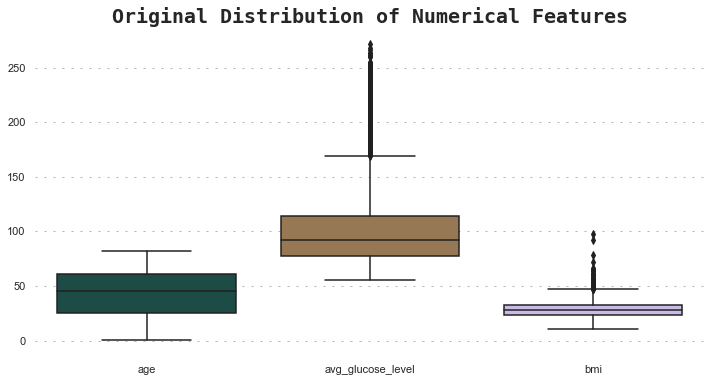

In [30]:
plt.figure(figsize=(12,6))
sns.set_style('white')

sns.boxplot(x="variable", y="value", data=pd.melt(X_train[nums]), palette="cubehelix")

sns.despine(left=True, bottom=True)
plt.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7), alpha=0.3)
plt.title('Original Distribution of Numerical Features', fontsize=20, fontweight='bold', fontfamily='monospace')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

- `avg_glucose_level` and `bmi` are right-skewed and have a lot of outliers.

## Standard Scaler

In [31]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
X_train_std = X_train.copy()
X_train_std[nums] = std_sc.fit_transform(X_train_std[nums])

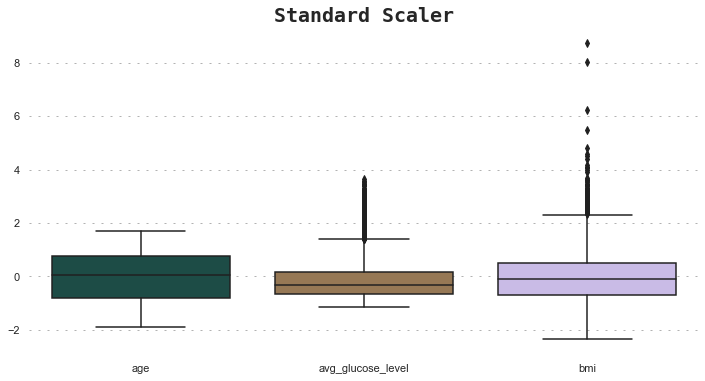

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x="variable", y="value", data=pd.melt(X_train_std[nums]), palette="cubehelix")

sns.despine(left=True, bottom=True)
plt.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7), alpha=0.3)
plt.title('Standard Scaler', fontsize=20, fontweight='bold', fontfamily='monospace')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

- Standard scaler is significantly affected by outliers.

## Robust Scaler

In [33]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_rs = X_train.copy()
X_train_rs[nums] = rs.fit_transform(X_train_rs[nums])
# X_val_rs[nums] = rs.transform(X_val_rs[nums])
# X_test_rs[nums] = rs.transform(X_test_rs[nums])

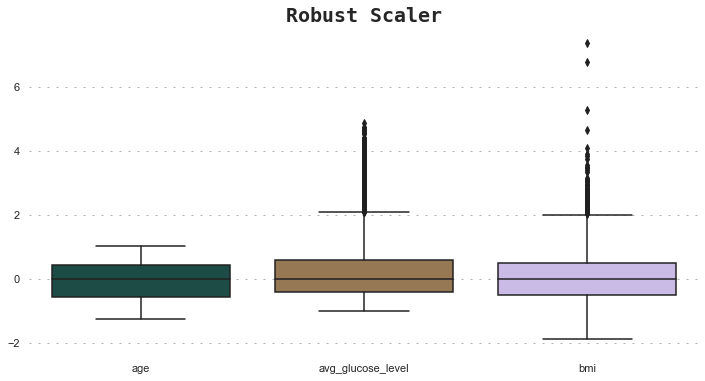

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x="variable", y="value", data=pd.melt(X_train_rs[nums]), palette="cubehelix")

sns.despine(left=True, bottom=True)
plt.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7), alpha=0.3)
plt.title('Robust Scaler', fontsize=20, fontweight='bold', fontfamily='monospace')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

- Robust scaler scales them to about the same scale while still retaining their distributions, much better than Standard Scaler.
- Robust scaler is commonly used to combat outliers in the distributions, by scaling the features in a way (using quartiles) that will not be influenced by outliers. 

## Quantile Transformer

In [35]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=10, random_state=42)
X_train_qt = X_train.copy()
X_train_qt[nums] = qt.fit_transform(X_train_qt[nums])

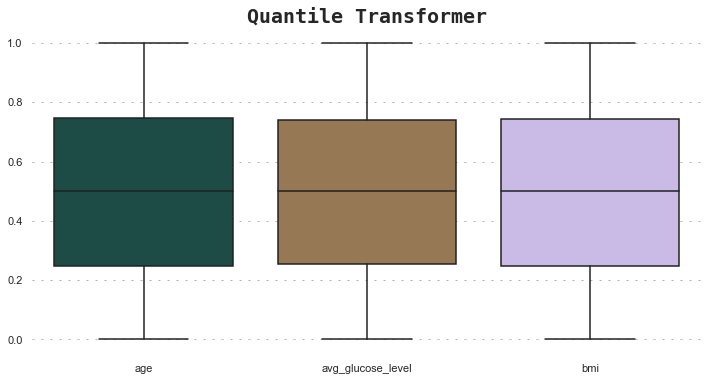

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x="variable", y="value", data=pd.melt(X_train_qt[nums]), palette='cubehelix')

sns.despine(left=True, bottom=True)
plt.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7), alpha=0.3)
plt.title('Quantile Transformer', fontsize=20, fontweight='bold', fontfamily='monospace')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

- Quantile transformer totally removed all the outliers and changed the original distribution of the features, <br>
which could result in loss of original information and correlation with other features, particularly the target feature

## Power Transformer

In [37]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_train_pt = X_train.copy()
X_train_pt[nums] = pt.fit_transform(X_train_pt[nums])

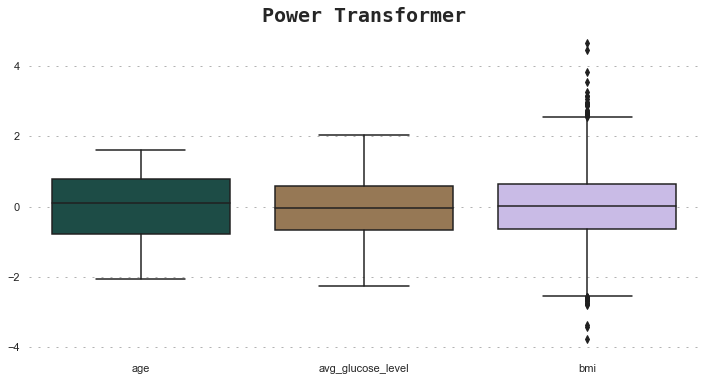

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot(x="variable", y="value", data=pd.melt(X_train_pt[nums]), palette='cubehelix')

sns.despine(left=True, bottom=True)
plt.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7), alpha=0.3)
plt.title('Power Transformer', fontsize=20, fontweight='bold', fontfamily='monospace')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

- Power Transformer generated more Gaussian-like distributions as expected, as implied by the almost identical lengths of the two tails of the each of the box plots.
- Some outliers are still found in `bmi`, which also indicates that the original distribution of `bmi` was very right skewed.
- This is still not ideal because their scales are still not perfectly same with one another.

## Log Transformation

In [39]:
df_nums_log = np.log(df_copy[nums])
df_nums_log.head()

,age,avg_glucose_level,bmi
0,4.204693,5.432367,3.600048
1,4.110874,5.309307,NaN
2,4.382027,4.662684,3.481240
3,3.891820,5.143008,3.538057
4,4.369448,5.159745,3.178054


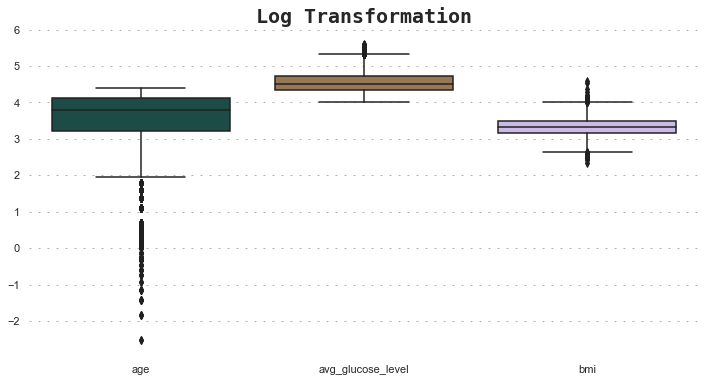

In [40]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.boxplot(x="variable", y="value", data=pd.melt(df_nums_log), palette='cubehelix')

sns.despine(left=True, bottom=True)
plt.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7), alpha=0.3)
plt.title('Log Transformation', fontsize=20, fontweight='bold', fontfamily='monospace')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

- Log transformation resulted in very different scales, which is not good for training.

# Training

**NOTE**

- The most important metrics to look out for are: precision, recall and especially F1 scores (with its variations, e.g. F1 macro-averaged).
- F1 score will be the primary metric to monitor here due to the highly imbalanced `stroke` class (i.e. our `target` variable).
- After conducting some quick research, it is decided that `ROC AUC` score is not chosen here because it is generally not good for imbalanced datasets, <br>
F1 score would work better for evaluating the model's performance on imbalanced datasets.

## Evaluation function

In [41]:
from sklearn.metrics import make_scorer, classification_report, confusion_matrix

target_names = ['No Stroke', 'Stroke']  # [0, 1]

def eval_model_on_train_val(model, transformed=False, 
                            return_pred=False, show_results=True):
    # global X_train, y_train, X_val, y_val, X_train_tf, X_val_tf
    
    if transformed:
        # model requires transformed dataset
        X_train_ = X_train_tf.copy()
        X_val_ = X_val_tf.copy()
    else:
        X_train_ = X_train.copy()
        X_val_ = X_val.copy()
    
    # display(pd.DataFrame(X_train_).head())
    y_pred = model.predict(X_train_)
    if show_results:
        print('[INFO] Evaluating on training set ...')
        print(confusion_matrix(y_train, y_pred))
        print(classification_report(y_train, y_pred, target_names=target_names))
    
    y_pred = model.predict(X_val_)
    if show_results:
        print('\n[INFO] Evaluating on validation set ...')
        print(confusion_matrix(y_val, y_pred))
        print(classification_report(y_val, y_pred, target_names=target_names))
    
    if return_pred:
        return y_pred

## Training Pipelines

In [42]:
df_copy = df.copy()

In [43]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(X=df_copy.drop(columns='stroke'),
                                                                             y=df_copy.stroke, 
                                                                             stratify=True,
                                                                             train_size=0.70)

In [44]:
cats = list(df.select_dtypes(exclude=['float64']).columns)
nums = list(df.select_dtypes(include=['float64']).columns)
print(f'Categorical variables:  {cats}')
print(f'Numerical variables:  {nums}')

Categorical variables:  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']
Numerical variables:  ['age', 'avg_glucose_level', 'bmi']


In [45]:
categorical_cols = cats.copy()
if 'stroke' in categorical_cols:
    categorical_cols.remove('stroke')
print(categorical_cols)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']


In [46]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
import xgboost as xgb

cat_pipeline = Pipeline([
    # ("one_hot_encoder", OneHotEncoder(drop='first')),
    ("ordinal_encoder", OrdinalEncoder()),
    # ('std_scaler', StandardScaler(with_mean=True)),
    ('rob_scaler', RobustScaler(with_centering=False)),
])

bmi_pipeline = Pipeline([
    # ('std_scaler_bmi', StandardScaler(with_mean=True)),
    ('rob_scaler_bmi', RobustScaler(with_centering=False)),
    # add_indicator is very useful to add extra columns denoting missing values
    ('KNN_imputer', KNNImputer(n_neighbors=3, add_indicator=True))
])

pipe_1 = ColumnTransformer([
    ('cat', cat_pipeline, categorical_cols),
    # ('std_scaler_nums', StandardScaler(with_mean=True), ['avg_glucose_level', 'age']),
    ('rob_scaler_nums', RobustScaler(with_centering=False), ['avg_glucose_level', 'age']),
    # ('rob_scaler_glucose', RobustScaler(with_centering=False), ['avg_glucose_level']),
    # ('std_scaler_age', StandardScaler(with_mean=False), ['age']),
    ('bmi_pipeline', bmi_pipeline, ['bmi'])
], remainder="passthrough")

train_pipe_1 = Pipeline([
    ('feature_transform', pipe_1),
    
    ('select_kbest', SelectKBest(k=10)),
    # ('pca_2', PCA(n_components=2)),
    
    ('rfc', RandomForestClassifier(random_state=42))
])

In [47]:
# prepare transformed datasets for certain use cases
X_train_tf = pipe_1.fit_transform(X_train)
X_val_tf = pipe_1.transform(X_val)

**Some extra pipelines for testing if necessary**

In [48]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

cat_pipeline = Pipeline([
    ("one_hot_encoder", OneHotEncoder(drop='first')),
    ('cat_scaler', RobustScaler(with_centering=False)),
])

cat_no_scale_pipeline = Pipeline([
    ("one_hot_encoder", OneHotEncoder(drop='first')),
])

pipe_2 = ColumnTransformer([
    ('num_std_scaler', RobustScaler(with_centering=False), nums),
    ('cat', cat_pipeline, categorical_cols),
], remainder="passthrough")

pipe_3 = ColumnTransformer([
    ('num_std_scaler', RobustScaler(with_centering=False), nums),
    ('cat', cat_no_scale_pipeline, categorical_cols),
], remainder="passthrough")

train_pipe_2 = Pipeline([
    ('pipe_2', pipe_2),
    ('KNN_imputer', KNNImputer(n_neighbors=3, add_indicator=True)),
    ('xgb', xgb.XGBClassifier(random_state=42)),
])

train_pipe_3 = Pipeline([
    ('pipe_3', pipe_3),
    ('KNN_imputer', KNNImputer(n_neighbors=3, add_indicator=True)),
    ('xgb', xgb.XGBClassifier(random_state=42)),
])

train_pipe_4 = Pipeline([
    ('pipe_1', pipe_1),
    ('log_reg', LogisticRegression(random_state=42)),
])

**First trial of training**

In [49]:
train_pipe_1.fit(X_train, y_train)

Pipeline(steps=[('feature_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder()),
                                                                  ('rob_scaler',
                                                                   RobustScaler(with_centering=False))]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status',
                                                   'hypertension',
                                                   'heart_disease']),
                                                 ('rob_scaler_nums',
 

In [50]:
eval_model_on_train_val(train_pipe_1)

[INFO] Evaluating on training set ...
[[3400    0]
 [   0  175]]
              precision    recall  f1-score   support

   No Stroke       1.00      1.00      1.00      3400
      Stroke       1.00      1.00      1.00       175

    accuracy                           1.00      3575
   macro avg       1.00      1.00      1.00      3575
weighted avg       1.00      1.00      1.00      3575


[INFO] Evaluating on validation set ...
[[729   1]
 [ 35   2]]
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.98       730
      Stroke       0.67      0.05      0.10        37

    accuracy                           0.95       767
   macro avg       0.81      0.53      0.54       767
weighted avg       0.94      0.95      0.93       767



## Choosing a model by using `lazypredict` library

In [68]:
X_train_tf = pipe_1.fit_transform(X_train)
X_val_tf = pipe_1.transform(X_val)

In [70]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import f1_score
from functools import partial

custom_metric = partial(f1_score, average='binary')
custom_metric.__name__ = 'f1_binary'
clf1 = LazyClassifier(verbose=0, ignore_warnings=True, random_state=42, custom_metric=custom_metric)
clf2 = LazyClassifier(verbose=0, ignore_warnings=True, random_state=42, custom_metric=custom_metric)

models_train, predictions_train = clf1.fit(X_train_tf, X_train_tf, y_train, y_train)
models_val, predictions_val = clf2.fit(X_train_tf, X_val_tf, y_train, y_val)

models_train

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  8.29it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,f1_binary,Time Taken
Model,,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,1.00,0.02
RandomForestClassifier,1.00,1.00,1.00,1.00,1.00,0.29
ExtraTreeClassifier,1.00,1.00,1.00,1.00,1.00,0.01
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.00,0.23
LabelPropagation,1.00,0.98,0.98,1.00,0.98,0.98
LabelSpreading,1.00,0.97,0.97,1.00,0.97,1.45
XGBClassifier,1.00,0.95,0.95,1.00,0.95,0.16
LGBMClassifier,0.99,0.95,0.95,0.99,0.95,0.15
BaggingClassifier,0.99,0.91,0.91,0.99,0.91,0.07


In [71]:
models_dict = clf2.provide_models(X_train_tf, X_val_tf, y_train, y_val)

In [72]:
models_dict.keys()

dict_keys(['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB', 'CalibratedClassifierCV', 'DecisionTreeClassifier', 'DummyClassifier', 'ExtraTreeClassifier', 'ExtraTreesClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LabelPropagation', 'LabelSpreading', 'LinearDiscriminantAnalysis', 'LinearSVC', 'LogisticRegression', 'NearestCentroid', 'PassiveAggressiveClassifier', 'Perceptron', 'QuadraticDiscriminantAnalysis', 'RandomForestClassifier', 'RidgeClassifier', 'RidgeClassifierCV', 'SGDClassifier', 'SVC', 'XGBClassifier', 'LGBMClassifier'])

In [77]:
eval_model_on_train_val(models_dict['AdaBoostClassifier'], transformed=True)

[INFO] Evaluating on training set ...
[[3395    5]
 [ 165   10]]
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.98      3400
      Stroke       0.67      0.06      0.11       175

    accuracy                           0.95      3575
   macro avg       0.81      0.53      0.54      3575
weighted avg       0.94      0.95      0.93      3575


[INFO] Evaluating on validation set ...
[[724   6]
 [ 36   1]]
              precision    recall  f1-score   support

   No Stroke       0.95      0.99      0.97       730
      Stroke       0.14      0.03      0.05        37

    accuracy                           0.95       767
   macro avg       0.55      0.51      0.51       767
weighted avg       0.91      0.95      0.93       767



In [56]:
models_train.columns

Index(['Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score', 'f1_binary',
       'Time Taken'],
      dtype='object')

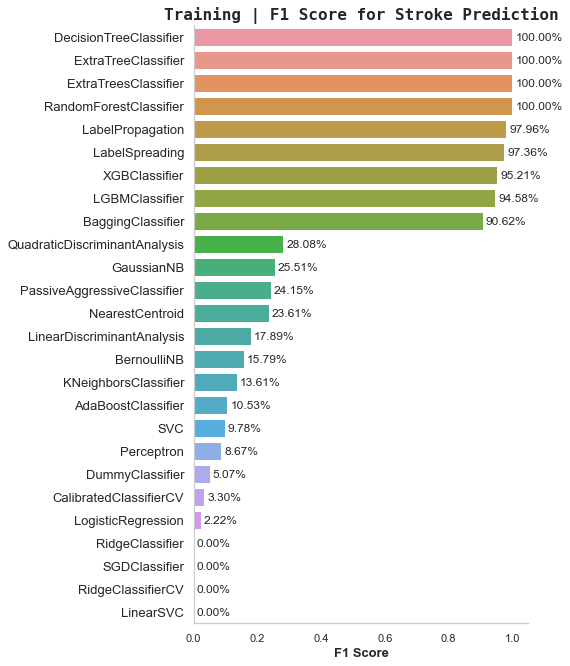

In [109]:
metric = "f1_binary"
models_train.sort_values(by=metric, ascending=False, inplace=True)

fig = plt.figure(figsize=(6, 11))
sns.set_theme(style="whitegrid")

ax = sns.barplot(y=models_train.index, x=metric, data=models_train)


for p in ax.patches:
    value = f'{(p.get_width() * 100):.2f}%'
    x = p.get_x() + p.get_width() + 0.01
    y = p.get_y() + p.get_height()/2 + 0.15
    ax.annotate(value, (x, y))

plt.title('Training | F1 Score for Stroke Prediction', 
          fontdict=dict(fontsize=16,
                        fontweight='bold', 
                        fontfamily='monospace'))
plt.ylabel(None)
plt.xlabel('F1 Score', fontsize=13, fontweight='bold')
sns.despine()
plt.grid(axis='x')
plt.yticks(fontsize=13)
# plt.savefig('training_result.png', bbox_inches='tight')
plt.show()

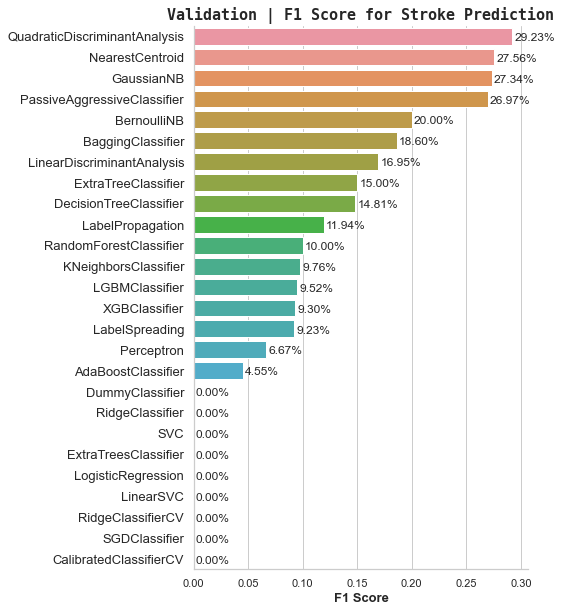

In [110]:
metric = "f1_binary"
models_val.sort_values(by=metric, ascending=False, inplace=True)

plt.figure(figsize=(6, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_val.index, x=metric, data=models_val)
plt.title('Validation | F1 Score for Stroke Prediction', 
          fontdict=dict(fontsize=15,
                        fontweight='bold', 
                        fontfamily='monospace'
                       ))
plt.ylabel(None)
plt.xlabel('F1 Score', fontsize=13, fontweight='bold')
sns.despine()

for p in ax.patches:
    value = f'{(p.get_width() * 100):.2f}%'
    x = p.get_x() + p.get_width() + 0.002
    y = p.get_y() + p.get_height()/2 + 0.2
    ax.annotate(value, (x, y))

plt.yticks(fontsize=13)
# plt.savefig('validation_result.png', bbox_inches='tight')
plt.show()

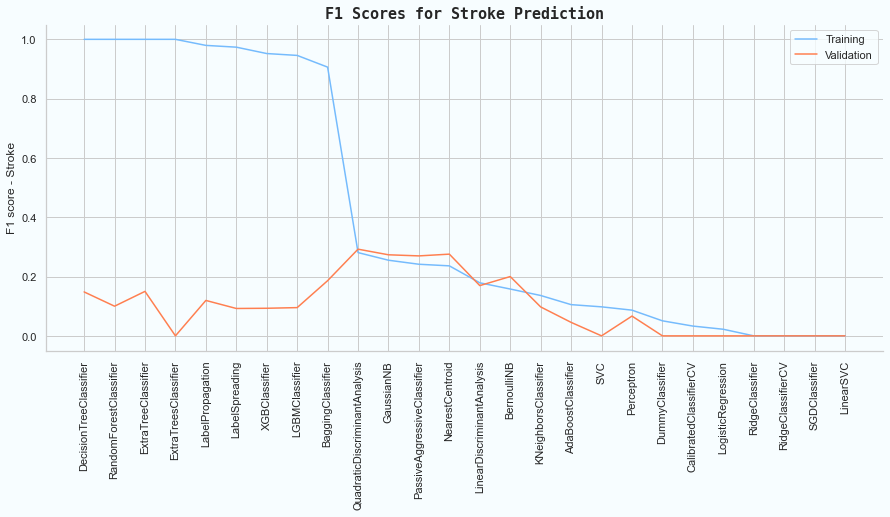

In [59]:
background_color = "#f7fdff"
fig = plt.figure(figsize=(15, 6), facecolor=background_color)
sns.set_style('whitegrid',  {"axes.facecolor": background_color})
sns.lineplot(x=models_train.index, y=metric, data=models_train, color='xkcd:sky blue')
sns.lineplot(x=models_val.index, y=metric, data=models_val, color='coral')
sns.despine()
plt.xticks(rotation=90)

plt.title('F1 Scores for Stroke Prediction', 
          fontdict=dict(fontsize=15,
                        fontweight='bold', 
                        fontfamily='monospace'
                       ))
plt.xlabel(None)
plt.ylabel('F1 score - Stroke')
plt.legend(['Training', 'Validation'])
plt.show()

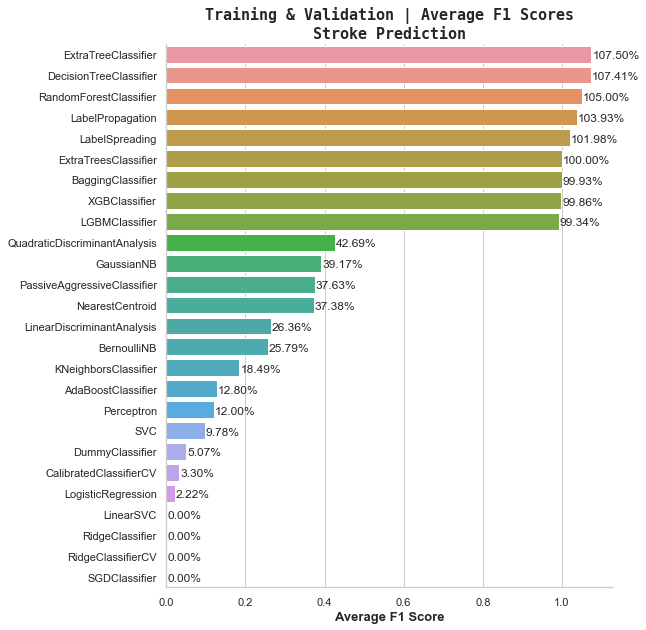

In [60]:
avg_model = models_train + models_val / 2

metric = "f1_binary"
avg_model.sort_values(by=metric, ascending=False, inplace=True)

plt.figure(figsize=(8, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=avg_model.index, x=metric, data=avg_model)
plt.title('Training & Validation | Average F1 Scores\nStroke Prediction', 
          fontdict=dict(fontsize=15,
                        fontweight='bold', 
                        fontfamily='monospace'
                       ))
plt.ylabel(None)
plt.xlabel('Average F1 Score', fontsize=13, fontweight='bold')
sns.despine()

for p in ax.patches:
        value = f'{(p.get_width() * 100):.2f}%'
        x = p.get_x() + p.get_width() + 0.002
        y = p.get_y() + p.get_height()/2 + 0.2
        ax.annotate(value, (x, y))


- It seems that `ExtraTreeClassifier` works the best when averaging both training and validation sets. <br>
- `DecisionTreeClassifer` and `RandomForestClassifier` also performed quite well in comparison. <br>
These are some of the most popular models used. Therefore they will be used as the primary models for further exploring.

## Testing with a shorter pipeline on pre-encoded features

### One Hot Encoding

In [61]:
df_copy = df.copy()

In [62]:
one_hot_cats = pd.get_dummies(df_copy.loc[:, 'gender':'smoking_status'], drop_first=True)

In [63]:
df_copy = df_copy.loc[:, 'hypertension': 'stroke']
df_copy = pd.concat([one_hot_cats, df_copy, df[nums]], axis=1)
df_copy.head()

,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi
0,1,1,0,1,0,1,1,0,0,0,1,1,67.00,228.69,36.60
1,0,1,0,0,1,0,0,1,0,0,0,1,61.00,202.21,nan
2,1,1,0,1,0,0,0,1,0,0,1,1,80.00,105.92,32.50
3,0,1,0,1,0,1,0,0,1,0,0,1,49.00,171.23,34.40
4,0,1,0,0,1,0,0,1,0,1,0,1,79.00,174.12,24.00


### Ordinal Encoding

In [66]:
df_copy = df.copy()

In [67]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df_copy[categorical_cols] = ord_enc.fit_transform(df_copy[categorical_cols])

In [68]:
df_copy.head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke,age,avg_glucose_level,bmi
0,1.00,1.00,2.00,1.00,1.00,0.00,1.00,1,67.00,228.69,36.60
1,0.00,1.00,3.00,0.00,2.00,0.00,0.00,1,61.00,202.21,nan
2,1.00,1.00,2.00,0.00,2.00,0.00,1.00,1,80.00,105.92,32.50
3,0.00,1.00,2.00,1.00,3.00,0.00,0.00,1,49.00,171.23,34.40
4,0.00,1.00,3.00,0.00,2.00,1.00,0.00,1,79.00,174.12,24.00


- Ordinal encoding works the same with label encoding.

### Train & Fine-tuning

- Using Ordinal Encoding as it produced the best results after testing

In [111]:
df_copy = df.copy()

In [112]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(X=df_copy.drop(columns='stroke'), 
                                                                             y=df_copy.stroke, 
                                                                             stratify=True,
                                                                             train_size=0.70)

In [113]:
X_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,age,avg_glucose_level,bmi
1610,Female,No,Private,Rural,Unknown,0,0,18.00,80.06,31.80
1550,Female,No,Self-employed,Urban,Unknown,0,0,50.00,77.67,34.50
569,Female,No,Self-employed,Urban,never smoked,0,0,32.00,65.30,40.40
3900,Male,No,Private,Urban,never smoked,0,0,46.00,159.67,37.30
1014,Female,Yes,Govt_job,Urban,Unknown,0,0,50.00,128.63,23.10


In [114]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
X_train[categorical_cols] = ord_enc.fit_transform(X_train[categorical_cols])
X_val[categorical_cols] = ord_enc.transform(X_val[categorical_cols])
X_test[categorical_cols] = ord_enc.transform(X_test[categorical_cols])

In [115]:
from sklearn.tree import ExtraTreeClassifier

etc_pipeline = Pipeline([('scaler', RobustScaler(with_centering=True)),
                         ('imputer', KNNImputer(n_neighbors=6, add_indicator=True)),
                         ('select_kbest', SelectKBest(k=10)),
                         ('etc_clf', ExtraTreeClassifier(random_state=42))])

In [116]:
etc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('imputer', KNNImputer(add_indicator=True, n_neighbors=6)),
                ('select_kbest', SelectKBest()),
                ('etc_clf', ExtraTreeClassifier(random_state=42))])

In [118]:
etc_pred = eval_model_on_train_val(etc_pipeline, return_pred=True)

[INFO] Evaluating on training set ...
[[3400    0]
 [   0  175]]
              precision    recall  f1-score   support

   No Stroke       1.00      1.00      1.00      3400
      Stroke       1.00      1.00      1.00       175

    accuracy                           1.00      3575
   macro avg       1.00      1.00      1.00      3575
weighted avg       1.00      1.00      1.00      3575


[INFO] Evaluating on validation set ...
[[709  21]
 [ 28   9]]
              precision    recall  f1-score   support

   No Stroke       0.96      0.97      0.97       730
      Stroke       0.30      0.24      0.27        37

    accuracy                           0.94       767
   macro avg       0.63      0.61      0.62       767
weighted avg       0.93      0.94      0.93       767



 - In this case, `Ordinal Encoding` performs better than `One Hot Encoding` after testing on both.
 - Now move on to perform some hyperparameter tuning.

In [120]:
etc_cm = confusion_matrix(y_val, etc_pred)

In [228]:
background_color

'#fbfbfb'

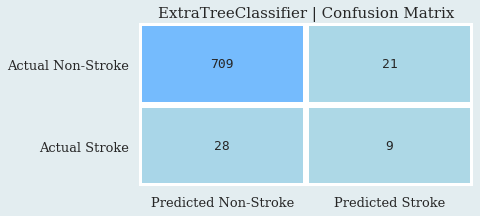

In [240]:
import matplotlib as mpl

background_color = "#E3EDF0"


colors = ["lightblue", "xkcd:sky blue", "xkcd:sky blue", "xkcd:sky blue"]
colormap = mpl.colors.LinearSegmentedColormap.from_list("",  colors)

fig = plt.figure(figsize=(6, 3))
ax = sns.heatmap(etc_cm, cmap=colormap, annot=True, fmt="d", linewidths=5, cbar=False,
            yticklabels=['Actual Non-Stroke','Actual Stroke'],
            xticklabels=['Predicted Non-Stroke','Predicted Stroke'],
            annot_kws={"fontsize": 13, "fontfamily": 'monospace'})

plt.title('ExtraTreeClassifier | Confusion Matrix', size=15, fontfamily='serif')
plt.yticks(size=13, fontfamily='serif')
plt.xticks(size=13, fontfamily='serif')
fig.patch.set_facecolor(background_color)
# ax.set_facecolor(background_color)
plt.show()

In [340]:
# etc_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', RobustScaler()),
  ('imputer', KNNImputer(add_indicator=True, n_neighbors=6)),
  ('select_kbest', SelectKBest()),
  ('etc_clf', ExtraTreeClassifier(random_state=42))],
 'verbose': False,
 'scaler': RobustScaler(),
 'imputer': KNNImputer(add_indicator=True, n_neighbors=6),
 'select_kbest': SelectKBest(),
 'etc_clf': ExtraTreeClassifier(random_state=42),
 'scaler__copy': True,
 'scaler__quantile_range': (25.0, 75.0),
 'scaler__with_centering': True,
 'scaler__with_scaling': True,
 'imputer__add_indicator': True,
 'imputer__copy': True,
 'imputer__metric': 'nan_euclidean',
 'imputer__missing_values': nan,
 'imputer__n_neighbors': 6,
 'imputer__weights': 'uniform',
 'select_kbest__k': 10,
 'select_kbest__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'etc_clf__ccp_alpha': 0.0,
 'etc_clf__class_weight': None,
 'etc_clf__criterion': 'gini',
 'etc_clf__max_depth': None,
 'etc_clf__max_features': 'auto',
 'etc_cl

#### ExtraTreeClassifier

In [350]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# param_grid = {
#     'select_kbest__k': [6, 7, 8, 9, 10],
#     'imputer__n_neighbors': [2, 4, 6, 8],
#     'etc_clf__max_depth': [35, 40, 45],
#     'etc_clf__max_features': [2, 4, 6],
#     'etc_clf__min_samples_leaf': [2, 4, 6],
#     'etc_clf__min_samples_split': [2, 4, 6]
# }

# grid = GridSearchCV(estimator=etc_pipeline, 
#                      param_grid=param_grid, cv=3,
#                      scoring='f1', refit=True,
#                      verbose=3, n_jobs=4)

# grid.fit(X_train, y_train)

# print(f'\nBest params -> {grid.best_params_}')
# print(f'Best score -> {grid.best_score_}')
# print(f'Validation score -> {grid.score(X_val, y_val)}')

Fitting 3 folds for each of 1620 candidates, totalling 4860 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 380 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 1020 tasks      | elapsed:   13.0s
[Parallel(n_jobs=4)]: Done 1916 tasks      | elapsed:   23.8s
[Parallel(n_jobs=4)]: Done 3068 tasks      | elapsed:   37.1s
[Parallel(n_jobs=4)]: Done 4476 tasks      | elapsed:   53.0s



Best params -> {'etc_clf__max_depth': 35, 'etc_clf__max_features': 6, 'etc_clf__min_samples_leaf': 2, 'etc_clf__min_samples_split': 6, 'imputer__n_neighbors': 8, 'select_kbest__k': 9}
Best score -> 0.1898148148148148
Validation score -> 0.20338983050847456


[Parallel(n_jobs=4)]: Done 4860 out of 4860 | elapsed:   57.1s finished


In [356]:
# etc_pred = eval_model_on_train_val(grid, return_pred=True)

[INFO] Evaluating on training set ...
[[3369   31]
 [ 103   72]]
              precision    recall  f1-score   support

   No Stroke       0.97      0.99      0.98      3400
      Stroke       0.70      0.41      0.52       175

    accuracy                           0.96      3575
   macro avg       0.83      0.70      0.75      3575
weighted avg       0.96      0.96      0.96      3575


[INFO] Evaluating on validation set ...
[[714  16]
 [ 31   6]]
              precision    recall  f1-score   support

   No Stroke       0.96      0.98      0.97       730
      Stroke       0.27      0.16      0.20        37

    accuracy                           0.94       767
   macro avg       0.62      0.57      0.59       767
weighted avg       0.93      0.94      0.93       767



- Fine-tuning did not help much with improving the F1 score on `Stroke`, i.e. 0.20 after fine-tuning, before was 0.27.
- Fine-tuning also made the training scores much worse than before.

### Final Evaluation on Test Set

In [393]:
y_pred = etc_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

[[711  19]
 [ 34   3]]
              precision    recall  f1-score   support

   No Stroke       0.95      0.97      0.96       730
      Stroke       0.14      0.08      0.10        37

    accuracy                           0.93       767
   macro avg       0.55      0.53      0.53       767
weighted avg       0.91      0.93      0.92       767



- On the test set that has never been seen before, it performed very poorly with F1-score of below 0.10.
- This is likely due to the imbalance of the dataset itself, or due to insufficient features to train a good predictive model.

## Interpreting the model with SHAP

SHAP (SHapley Additive exPlanations) is a very good way to explain and interpret a model as it is much more intuitive compared to traditional means like feature importance.

In [405]:
scaler = RobustScaler()
X_train_ = scaler.fit_transform(X_train.copy())
X_val_ = scaler.transform(X_val.copy())
X_test_ = scaler.transform(X_test.copy())


imputer = KNNImputer(n_neighbors=6, add_indicator=True)
X_train_ = imputer.fit_transform(X_train_)
X_val_ = imputer.transform(X_val_)
X_test_ = imputer.transform(X_test_)

X_train_[:, :-1] = scaler.inverse_transform(X_train_[:, :-1])
X_val_[:, :-1] = scaler.inverse_transform(X_val_[:, :-1])
X_test_[:, :-1] = scaler.inverse_transform(X_test_[:, :-1])

In [302]:
# X_train_ = X_train.copy()
# X_val_ = X_val.copy()
# X_train_['bmi_NaN'] = X_train_tf[:, -1]
# X_val_['bmi_NaN'] = X_val_tf[:, -1]

- Typical usage of `KNNImputer`:
- Scale -> Impute -> Inverse scale
- The reverse scaling is also performed in order to preserve the original values for interpreting later.

In [406]:
X_train_ = pd.DataFrame(X_train_, columns=list(X_train.columns) + ['bmi_NaN'])
X_val_ = pd.DataFrame(X_val_, columns=list(X_train.columns) + ['bmi_NaN'])
X_val_ = pd.DataFrame(X_val_, columns=list(X_train.columns) + ['bmi_NaN'])
X_train_.head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,age,avg_glucose_level,bmi,bmi_NaN
0,0.00,0.00,2.00,0.00,0.00,0.00,0.00,18.00,80.06,31.80,0.00
1,0.00,0.00,3.00,1.00,0.00,0.00,0.00,50.00,77.67,34.50,0.00
2,0.00,0.00,3.00,1.00,2.00,0.00,0.00,32.00,65.30,40.40,0.00
3,1.00,0.00,2.00,1.00,2.00,0.00,0.00,46.00,159.67,37.30,0.00
4,0.00,1.00,0.00,1.00,0.00,0.00,0.00,50.00,128.63,23.10,0.00


In [407]:
# Have to train a new classifier because SHAP does not support scikit-learn's pipeline
# Using RandomForest here because it produced much better SHAP plot than ExtraTreeClassifier for some reason...
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_, y_train)

RandomForestClassifier(random_state=42)

In [408]:
y_pred = clf.predict(X_val_)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names=target_names))

[[729   1]
 [ 35   2]]
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.98       730
      Stroke       0.67      0.05      0.10        37

    accuracy                           0.95       767
   macro avg       0.81      0.53      0.54       767
weighted avg       0.94      0.95      0.93       767



- F1 score for stroke is still around 10-15%

In [410]:
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_val_)

In [411]:
sns.set_style('white')

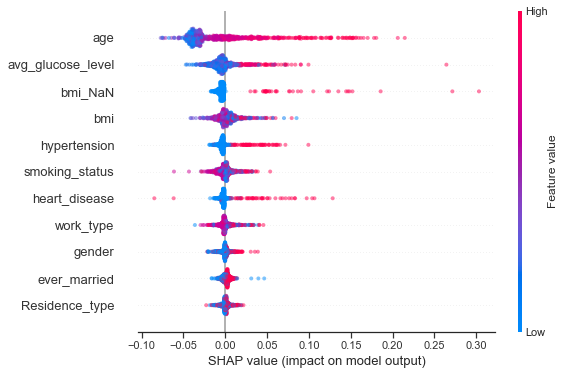

In [412]:
shap.summary_plot(shap_values[1], X_val_, alpha=0.5)

- SHAP value is just like feature importance, but this graph can provide more insights by showing how much each feature can affect the target variable (model output) in both negative and positive predictions.
- In this graph, the colors also represent the values of the features, from low to high value -> from blue to red
- In this case, all the numerical features have significant impact on the model output, particularly the `age` feature, <br>
which has the highest impact for predicting `stroke`.
- `bmi_NaN` (just an indicator for missing BMI values) also shows very high impact on predicting `stroke`.

Text(0.5, 1.0, 'Age dependence plot')

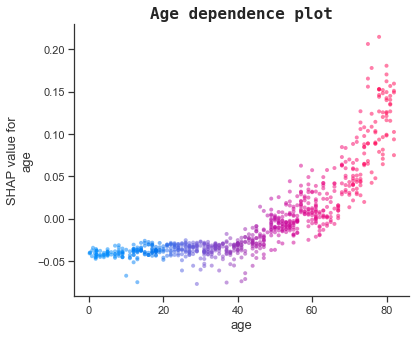

In [414]:
shap.dependence_plot('age', shap_values[1], X_val_, interaction_index="age", 
                     alpha=0.5, show=False)
plt.title("Age dependence plot", 
          fontfamily='monospace', fontweight='bold', fontsize=16)

- From the dependence plot, we can see that `age` has a trend of increasing with SHAP values too.
- This graph also shows that higher `age` -> more `stroke` predictions.

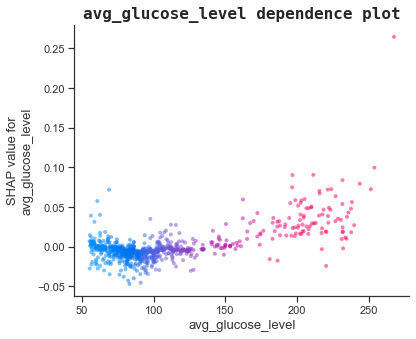

In [415]:
shap.dependence_plot('avg_glucose_level', shap_values[1], X_val_, 
                     interaction_index="avg_glucose_level", alpha=0.5, show=False)
plt.title("avg_glucose_level dependence plot", 
          fontfamily='monospace', fontweight='bold', fontsize=16)
plt.show()

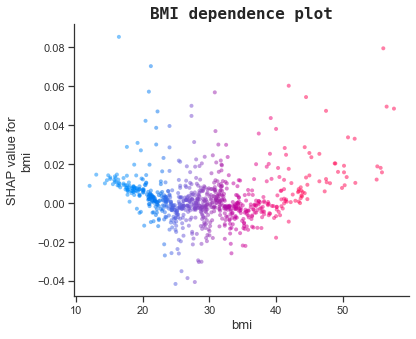

In [416]:
shap.dependence_plot('bmi', shap_values[1], X_val_, 
                     interaction_index="bmi", alpha=0.5, show=False)
plt.title("BMI dependence plot", 
          fontfamily='monospace', fontweight='bold', fontsize=16)
plt.show()

- Both dependence plots of `avg_glucose_level` and `bmi` also show their respective thresholds where stroke is more prevalent at higher values.
- Threshold is at around 150 for `avg_glucose_level`; while the threshold for `bmi` can be seen more clearly at closer to 30.
- **NOTE**: The numerical features here are not scaled with any sort of algorithm yet, after sorting, the SHAP values would likely be different.
- This is to allow us to see the impact of the actual values themselves in the dependence plots.

# CONCLUSION
- More data needs to be collected especially for stroke sufferers in order to build a more robust model to predict whether a person is suffered from stroke or not.
- The selection of data to be collected also needs to be more balanced and contains more features if possible.

# APPENDIX

- Tried other methods and found not much improvement.

## Hyperparameter Tuning on XGBoost

In [239]:
# To check the trained etc parameters
for k, v in etc_pipeline.get_params().items():
    if str(k).startswith('etc_clf__'):
        print(k, v)

xgb_clf__objective binary:logistic
xgb_clf__base_score 0.5
xgb_clf__booster gbtree
xgb_clf__colsample_bylevel 1
xgb_clf__colsample_bynode 1
xgb_clf__colsample_bytree 1
xgb_clf__gamma 0
xgb_clf__gpu_id -1
xgb_clf__importance_type gain
xgb_clf__interaction_constraints 
xgb_clf__learning_rate 0.300000012
xgb_clf__max_delta_step 0
xgb_clf__max_depth 6
xgb_clf__min_child_weight 1
xgb_clf__missing nan
xgb_clf__monotone_constraints ()
xgb_clf__n_estimators 100
xgb_clf__n_jobs 0
xgb_clf__num_parallel_tree 1
xgb_clf__random_state 42
xgb_clf__reg_alpha 0
xgb_clf__reg_lambda 1
xgb_clf__scale_pos_weight 1
xgb_clf__subsample 1
xgb_clf__tree_method exact
xgb_clf__validate_parameters 1
xgb_clf__verbosity None


In [221]:
etc_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'imputer', 'select_kbest', 'xgb_clf', 'scaler__copy', 'scaler__quantile_range', 'scaler__with_centering', 'scaler__with_scaling', 'imputer__add_indicator', 'imputer__copy', 'imputer__metric', 'imputer__missing_values', 'imputer__n_neighbors', 'imputer__weights', 'select_kbest__k', 'select_kbest__score_func', 'xgb_clf__objective', 'xgb_clf__base_score', 'xgb_clf__booster', 'xgb_clf__colsample_bylevel', 'xgb_clf__colsample_bynode', 'xgb_clf__colsample_bytree', 'xgb_clf__gamma', 'xgb_clf__gpu_id', 'xgb_clf__importance_type', 'xgb_clf__interaction_constraints', 'xgb_clf__learning_rate', 'xgb_clf__max_delta_step', 'xgb_clf__max_depth', 'xgb_clf__min_child_weight', 'xgb_clf__missing', 'xgb_clf__monotone_constraints', 'xgb_clf__n_estimators', 'xgb_clf__n_jobs', 'xgb_clf__num_parallel_tree', 'xgb_clf__random_state', 'xgb_clf__reg_alpha', 'xgb_clf__reg_lambda', 'xgb_clf__scale_pos_weight', 'xgb_clf__subsample', 'xgb_clf__tree_method', 'xgb_clf_

In [244]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_grid = {
    "imputer__n_neighbors": np.array([3, 4, 5, 6]),
    "select_kbest__k": np.array([6, 8, 10]),
    'etc_clf__min_child_weight': np.array([1, 5, 10]),
    'etc_clf__gamma': np.array([0, 0.5, 1, 1.5, 2, 5]),
    'etc_clf__subsample': np.array([0.6, 0.8, 1.0]),
    'etc_clf__colsample_bytree': np.array([0.6, 0.8, 1.0, 1.2]),
    'etc_clf__max_depth': np.array([3, 4, 5, 6, 7, 8])
}

rs_cv = RandomizedSearchCV(estimator=etc_pipeline, n_iter=100, 
                           param_distributions=param_grid, cv=3,
                           scoring='f1_macro', refit=True,
                           verbose=3, n_jobs=4, random_state=42)

rs_cv.fit(X_train, y_train)

print(f'\nBest params -> {rs_cv.best_params_}')
print(f'Best score -> {rs_cv.best_score_}')
print(f'Validation score -> {rs_cv.score(X_val, y_val)}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 148 tasks      | elapsed:    6.6s



Best params -> {'xgb_clf__subsample': 0.6, 'xgb_clf__min_child_weight': 1, 'xgb_clf__max_depth': 3, 'xgb_clf__gamma': 0, 'xgb_clf__colsample_bytree': 1.0, 'select_kbest__k': 10, 'imputer__n_neighbors': 5}
Best score -> 0.5599306011204763
Validation score -> 0.5379518072289157


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:   12.1s finished


- Validation score of macro-averaged is not much better than before tuning.

In [245]:
rs_cv_df = pd.DataFrame(rs_cv.cv_results_)
rs_cv_df.sort_values('rank_test_score', inplace=True)
rs_cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgb_clf__subsample,param_xgb_clf__min_child_weight,param_xgb_clf__max_depth,param_xgb_clf__gamma,param_xgb_clf__colsample_bytree,param_select_kbest__k,param_imputer__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
66,0.15,0.00,0.02,0.00,0.60,1,3,0,1.00,10,5,"{'xgb_clf__subsample': 0.6, 'xgb_clf__min_chil...",0.57,0.57,0.53,0.56,0.02,1
50,0.23,0.01,0.02,0.00,1.00,1,8,2,1.00,10,6,"{'xgb_clf__subsample': 1.0, 'xgb_clf__min_chil...",0.57,0.57,0.53,0.56,0.02,2
94,0.18,0.00,0.02,0.00,0.80,5,8,1,0.80,10,6,"{'xgb_clf__subsample': 0.8, 'xgb_clf__min_chil...",0.58,0.53,0.56,0.55,0.02,3
16,0.18,0.00,0.02,0.00,1.00,5,7,0.50,1.00,10,5,"{'xgb_clf__subsample': 1.0, 'xgb_clf__min_chil...",0.56,0.55,0.54,0.55,0.01,4
22,0.22,0.00,0.02,0.00,0.80,1,7,1,0.80,10,4,"{'xgb_clf__subsample': 0.8, 'xgb_clf__min_chil...",0.55,0.58,0.52,0.55,0.02,5


In [246]:
eval_model_on_train_val(rs_cv)

[INFO] Evaluating on training set ...
[[3407    1]
 [ 117   51]]
              precision    recall  f1-score   support

   No Stroke       0.97      1.00      0.98      3408
      Stroke       0.98      0.30      0.46       168

    accuracy                           0.97      3576
   macro avg       0.97      0.65      0.72      3576
weighted avg       0.97      0.97      0.96      3576


[INFO] Evaluating on validation set ...
[[729   4]
 [ 32   2]]
              precision    recall  f1-score   support

   No Stroke       0.96      0.99      0.98       733
      Stroke       0.33      0.06      0.10        34

    accuracy                           0.95       767
   macro avg       0.65      0.53      0.54       767
weighted avg       0.93      0.95      0.94       767



In [249]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "imputer__n_neighbors": range(1, 5),
    "select_kbest__k": range(3, 9),
    "etc_clf__max_depth": [4],
    "etc_clf__learning_rate": [0.2, 0.3, 0.4],
    "etc_clf__gamma": [1, 2, 3],
    "etc_clf__reg_lambda": [9, 10, 11, 12],
    "etc_clf__scale_pos_weight": [5],
    "etc_clf__subsample": [0.8],
    "etc_clf__colsample_bytree": [0.5],
}

grid = GridSearchCV(estimator=etc_pipeline, 
                    param_grid=param_grid, cv=3,
                    scoring='f1_macro', refit=True,
                    verbose=1, n_jobs=-1)

grid.fit(X_train, y_train)

print(f'\nBest params -> {grid.best_params_}')
print(f'Best score -> {grid.best_score_}')
print(f'Validation score -> {grid.score(X_val, y_val)}')

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 2428 tasks      | elapsed:   43.8s



Best params -> {'imputer__n_neighbors': 1, 'select_kbest__k': 3, 'xgb_clf__colsample_bytree': 0.5, 'xgb_clf__gamma': 1, 'xgb_clf__learning_rate': 0.4, 'xgb_clf__max_depth': 4, 'xgb_clf__reg_lambda': 9, 'xgb_clf__scale_pos_weight': 5, 'xgb_clf__subsample': 0.8}
Best score -> 0.5945212854754867
Validation score -> 0.5837303262377134


[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed:   47.3s finished


In [250]:
grid_df = pd.DataFrame(grid.cv_results_)
grid_df.sort_values('rank_test_score', inplace=True)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_imputer__n_neighbors,param_select_kbest__k,param_xgb_clf__colsample_bytree,param_xgb_clf__gamma,param_xgb_clf__learning_rate,param_xgb_clf__max_depth,param_xgb_clf__reg_lambda,param_xgb_clf__scale_pos_weight,param_xgb_clf__subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
440,0.14,0.01,0.03,0.01,3,3,0.50,1,0.40,4,9,5,0.80,"{'imputer__n_neighbors': 3, 'select_kbest__k':...",0.59,0.61,0.58,0.59,0.01,1
8,0.13,0.01,0.02,0.00,1,3,0.50,1,0.40,4,9,5,0.80,"{'imputer__n_neighbors': 1, 'select_kbest__k':...",0.59,0.61,0.58,0.59,0.01,1
656,0.15,0.00,0.02,0.00,4,3,0.50,1,0.40,4,9,5,0.80,"{'imputer__n_neighbors': 4, 'select_kbest__k':...",0.59,0.61,0.58,0.59,0.01,1
224,0.12,0.00,0.02,0.00,2,3,0.50,1,0.40,4,9,5,0.80,"{'imputer__n_neighbors': 2, 'select_kbest__k':...",0.59,0.61,0.58,0.59,0.01,1
29,0.14,0.01,0.02,0.00,1,3,0.50,3,0.30,4,10,5,0.80,"{'imputer__n_neighbors': 1, 'select_kbest__k':...",0.58,0.60,0.60,0.59,0.01,5


In [251]:
eval_model_on_train_val(grid)

[INFO] Evaluating on training set ...
[[3216  192]
 [ 101   67]]
              precision    recall  f1-score   support

   No Stroke       0.97      0.94      0.96      3408
      Stroke       0.26      0.40      0.31       168

    accuracy                           0.92      3576
   macro avg       0.61      0.67      0.64      3576
weighted avg       0.94      0.92      0.93      3576


[INFO] Evaluating on validation set ...
[[685  48]
 [ 24  10]]
              precision    recall  f1-score   support

   No Stroke       0.97      0.93      0.95       733
      Stroke       0.17      0.29      0.22        34

    accuracy                           0.91       767
   macro avg       0.57      0.61      0.58       767
weighted avg       0.93      0.91      0.92       767



- Training score has dropped significantly after tuning for some reason I am not sure.
- Validation score of macro-averaged is still not much better than before tuning.

## Removal of outliers via IQR

In [99]:
def tukey_outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    
    iqr = q3 - q1
    
    lower_boundary = q1 - (iqr * 1.5)
    upper_boundary = q3 + (iqr * 1.5)
    
    outliers = x[(x < lower_boundary) | (x > upper_boundary)]
    return outliers, lower_boundary, upper_boundary

outliers_bmi, lower_boundary_bmi, upper_boundary_bmi = tukey_outliers(X_train["bmi"])
outliers_glucose, lower_boundary_glucose, upper_boundary_glucose = tukey_outliers(X_train["avg_glucose_level"])
len(outliers_bmi), len(outliers_glucose)

(88, 452)

In [112]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(X=df_copy.drop(columns='stroke'), y=df_copy.stroke, train_size=0.70)

In [96]:
X_train_iqr = X_train.copy()
X_train_iqr['bmi'].clip(lower_boundary_bmi, upper_boundary_bmi, inplace=True)
X_train_iqr['avg_glucose_level'].clip(lower_boundary_glucose, upper_boundary_glucose, inplace=True)

In [103]:
X_train_iqr.head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,age,avg_glucose_level,bmi
1513,Male,No,Private,Rural,smokes,0,0,18.00,143.45000,32.0
3342,Male,Yes,Self-employed,Urban,smokes,0,0,63.00,170.19625,32.2
159,Female,Yes,Self-employed,Rural,never smoked,1,0,81.00,74.02000,25.0
832,Female,Yes,Private,Urban,Unknown,0,0,33.00,121.04000,31.4
3610,Female,No,children,Rural,Unknown,0,0,1.64,82.49000,15.1


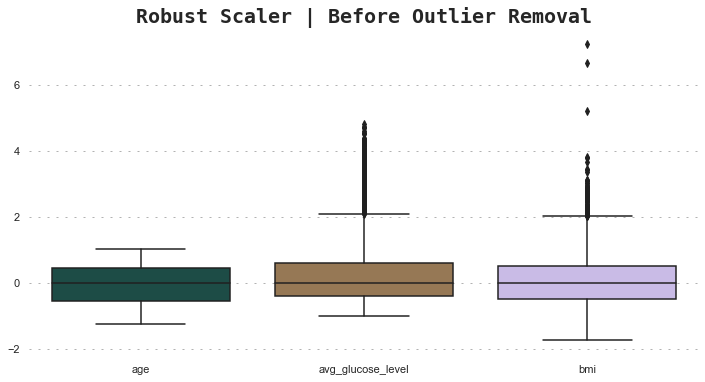

In [75]:
X_train_rs = X_train.copy()
X_train_rs.loc[:, 'age': 'bmi'] = rs.fit_transform(X_train_rs.loc[:, 'age': 'bmi'])

plt.figure(figsize=(12,6))
sns.boxplot(x="variable", y="value", data=pd.melt(X_train_rs[nums]), palette="cubehelix")

sns.despine(left=True, bottom=True)
plt.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7), alpha=0.3)
plt.title('Robust Scaler | Before Outlier Removal', fontsize=20,fontweight='bold', fontfamily='monospace')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

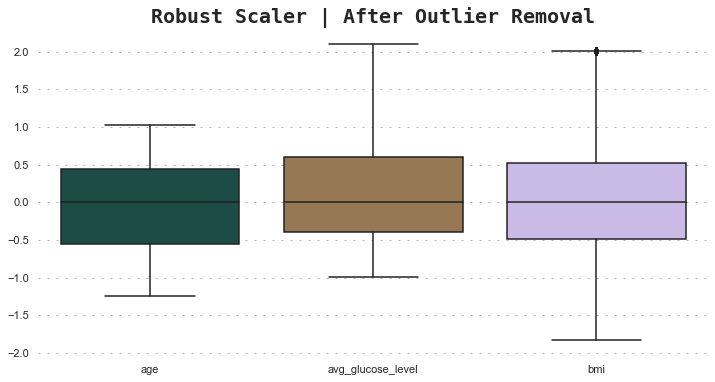

In [97]:
X_train_iqr_rs = X_train_iqr.copy()
X_train_iqr_rs.loc[:, 'age': 'bmi'] = rs.fit_transform(X_train_iqr_rs.loc[:, 'age': 'bmi'])

plt.figure(figsize=(12,6))
sns.boxplot(x="variable", y="value", data=pd.melt(X_train_iqr_rs[nums]), palette="cubehelix")

sns.despine(left=True, bottom=True)
plt.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7), alpha=0.3)
plt.title('Robust Scaler | After Outlier Removal', fontsize=20,fontweight='bold', fontfamily='monospace')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [127]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()
X_val_iqr = X_val.copy()
X_train_iqr.loc[:, 'gender': 'smoking_status'] = ord_encoder.fit_transform(X_train_iqr.loc[:, 'gender': 'smoking_status'])
X_val_iqr.loc[:, 'gender': 'smoking_status'] = ord_encoder.transform(X_val_iqr.loc[:, 'gender': 'smoking_status'])

In [106]:
xgb_pipeline.fit(X_train_iqr, y_train)

Pipeline(steps=[('scaler', RobustScaler(with_centering=False)),
                ('imputer', KNNImputer(add_indicator=True, n_neighbors=3)),
                ('select_kbest', SelectKBest(k=6)),
                ('xgb_clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
       

In [128]:
y_pred = xgb_pipeline.predict(X_train_iqr)
print('[INFO] Evaluating on training set ...')
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred, target_names=target_names))

y_pred = xgb_pipeline.predict(X_val_iqr)
print('\n[INFO] Evaluating on validation set ...')
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names=target_names))

[INFO] Evaluating on training set ...
[[3406    2]
 [  40  128]]
              precision    recall  f1-score   support

   No Stroke       0.99      1.00      0.99      3408
      Stroke       0.98      0.76      0.86       168

    accuracy                           0.99      3576
   macro avg       0.99      0.88      0.93      3576
weighted avg       0.99      0.99      0.99      3576


[INFO] Evaluating on validation set ...
[[722  11]
 [ 31   3]]
              precision    recall  f1-score   support

   No Stroke       0.96      0.98      0.97       733
      Stroke       0.21      0.09      0.12        34

    accuracy                           0.95       767
   macro avg       0.59      0.54      0.55       767
weighted avg       0.93      0.95      0.93       767



- Removing outliers did not improve the validation F1 score. F1_macro is still lower than 0.60, <br>
this is as expected because tree models are generally robust to outliers.

## Trying IsolationForest for outlier removal

In [339]:
from sklearn.ensemble import IsolationForest

X_train_tf = pipe_1.fit_transform(X_train)
X_val_tf = pipe_1.transform(X_val)

# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1, random_state=42)

yhat = iso.fit_predict(X_train_tf)
# select all rows that are not outliers
mask = (yhat != -1)
X_train_iso, y_train_iso = X_train_tf[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train_iso.shape, y_train_iso.shape)

(3218, 15) (3218,)


In [340]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_iso, y_train_iso)

RandomForestClassifier(random_state=42)

In [341]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, random_state=42)
xgb_clf.fit(X_train_iso, y_train_iso)

[22:39:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [342]:
eval_model_on_train_val(xgb_clf, transformed=True)

[INFO] Evaluating on training set ...
[[3385   23]
 [  46  122]]
              precision    recall  f1-score   support

   No Stroke       0.99      0.99      0.99      3408
      Stroke       0.84      0.73      0.78       168

    accuracy                           0.98      3576
   macro avg       0.91      0.86      0.88      3576
weighted avg       0.98      0.98      0.98      3576


[INFO] Evaluating on validation set ...
[[720  13]
 [ 31   3]]
              precision    recall  f1-score   support

   No Stroke       0.96      0.98      0.97       733
      Stroke       0.19      0.09      0.12        34

    accuracy                           0.94       767
   macro avg       0.57      0.54      0.55       767
weighted avg       0.92      0.94      0.93       767



- Once again, removing outliers this way did not improve the validation F1 score. F1_macro is still lower than 0.60.

## Try adding BMI_range

In [330]:
from sklearn.base import BaseEstimator, TransformerMixin

BMI_idx = 13

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bmi_range=True): # no *args or **kargs
        self.add_bmi_range = add_bmi_range
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X)
        # display(df.head())
        
        if self.add_bmi_range:
        
            def create_bmi_range(bmi):
                # create bmi_range
                if bmi < 18.5:
                    return 0  # underweight
                elif bmi < 25.0:
                    return 1  # normal
                elif bmi < 30.0:
                    return 2  # overweight
                elif bmi < 40.0:
                    return 3  # obesity
                else:
                    return 4  # extreme obesity
            
            # 'bmi_range' will become the last column -> 14
            df['bmi_range'] = df.loc[:, BMI_idx].apply(create_bmi_range)
            
            # drop the bmi column
            df = df.drop(columns=BMI_idx)
            # display(df.head())
            
            return df.to_numpy()
        else:
            return X

In [331]:
categorical_cols = ['gender', 'ever_married', 
                    'work_type', 'Residence_type', 
                    'smoking_status', 'hypertension', 
                    'heart_disease']

In [332]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

cat_pipeline = Pipeline([
    ("one_hot_encoder", OneHotEncoder(drop='first')),
    # ("label_encoder", OrdinalEncoder()),
    ('std_scaler', StandardScaler(with_mean=False)),
])

bmi_pipeline = Pipeline([
    ('std_scaler_bmi', StandardScaler(with_mean=False)),
    # ('robust_scaler_bmi', RobustScaler(with_centering=False)),
    # add_indicator is very useful to add extra columns denoting missing values
    ('KNN_imputer', KNNImputer(n_neighbors=10, add_indicator=True))
])

transformer_all = ColumnTransformer([
    ('std_scaler_glucose', StandardScaler(with_mean=False), ['avg_glucose_level']),
    ('std_scaler_age', StandardScaler(with_mean=False), ['age']),
    ('cat', cat_pipeline, categorical_cols),
    ('bmi_pipe', bmi_pipeline, ['bmi'])  # index = 13
], remainder="passthrough")

pipe_1 = Pipeline([
    ('feature_transform', transformer_all),
    ('bmi_range_adder', CombinedAttributesAdder()),
    
    # ('select_kbest_8', SelectKBest(k=8)),
    # ('pca_2', PCA(n_components=2)),
    
    # ('rfc', RandomForestClassifier()),
    # ('xgb', xgb.XGBClassifier(use_label_encoder=False)),
])

In [333]:
# X_train_tf = pd.DataFrame(pipe_1.fit_transform(X_train))
X_train_tf = (pipe_1.fit_transform(X_train))
X_val_tf = (pipe_1.transform(X_val))

In [322]:
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1, random_state=42)

yhat = iso.fit_predict(X_train_tf)
# select all rows that are not outliers
mask = (yhat != -1)
X_train_iso, y_train_iso = X_train_tf[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train_iso.shape, y_train_iso.shape)

(3218, 15) (3218,)


In [323]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_iso, y_train_iso)

RandomForestClassifier(random_state=42)

In [324]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, random_state=42)
xgb_clf.fit(X_train_iso, y_train_iso)

[22:38:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [325]:
eval_model_on_train_val(xgb_clf, transformed=True)

[INFO] Evaluating on training set ...
[[3368   40]
 [  65  103]]
              precision    recall  f1-score   support

   No Stroke       0.98      0.99      0.98      3408
      Stroke       0.72      0.61      0.66       168

    accuracy                           0.97      3576
   macro avg       0.85      0.80      0.82      3576
weighted avg       0.97      0.97      0.97      3576


[INFO] Evaluating on validation set ...
[[721  12]
 [ 30   4]]
              precision    recall  f1-score   support

   No Stroke       0.96      0.98      0.97       733
      Stroke       0.25      0.12      0.16        34

    accuracy                           0.95       767
   macro avg       0.61      0.55      0.57       767
weighted avg       0.93      0.95      0.94       767



## Try tuning other classifiers

In [180]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
# from sklearn.metrics import f1_score, make_scorer

# X_train_tf = pipe_1.fit_transform(X_train)
# X_val_tf = pipe_1.transform(X_val)

# gbc = GradientBoostingClassifier(random_state=42)

# gbc_param_grid = {    
#     'n_estimators': [i for i in range(50,201,50)],
#     'max_depth': range(4, 9),
#     'min_samples_split': [i for i in range(8, 17, 2)],
#     'max_leaf_nodes': [i for i in range(8, 15, 2)],
# }

# grid = GridSearchCV(estimator=gbc, param_grid=gbc_param_grid, cv=3,
#                     scoring={'f1': make_scorer(f1_score)}, refit='f1',
#                     verbose=1, n_jobs=-1)

# grid.fit(X_train_tf, y_train)

# print('\nBest params -> {}'.format(grid.best_params_))
# print('Best score -> {}'.format(grid.best_score_))
# print('Validation score -> {}'.format(grid.score(X_val_tf, y_val)))

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.1min finished



Best params-> {'max_depth': 7, 'max_leaf_nodes': 10, 'min_samples_split': 12, 'n_estimators': 200}
Best score-> 0.1452991452991453
Validation score -> 0.08695652173913045


In [218]:
# X_train_tf = pipe_1.fit_transform(X_train)
# X_val_tf = pipe_1.transform(X_val)

# xgb_clf = xgb.XGBClassifier(use_label_encoder=False, random_state=42)

# param_grid = {
#     "max_depth": [3, 4, 5, 7],
#     "learning_rate": [0.1, 0.01, 0.05],
#     "gamma": [0, 0.25, 1],
#     "reg_lambda": [0, 1, 10],
#     "scale_pos_weight": [1, 3, 5],
#     "subsample": [0.8],
#     "colsample_bytree": [0.5],
# }

# grid = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3,
#                     scoring={'f1': make_scorer(f1_score)}, refit='f1',
#                     verbose=1, n_jobs=-1)

# grid.fit(X_train_tf, y_train)

# print('\nBest params -> {}'.format(grid.best_params_))
# print('Best score -> {}'.format(grid.best_score_))
# print('Validation score -> {}'.format(grid.score(X_val_tf, y_val)))

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   45.1s


[17:05:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Best params-> {'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 10, 'scale_pos_weight': 5, 'subsample': 0.8}
Best score-> 0.22745332422586526
Validation score -> 0.24324324324324323


[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed:   56.4s finished


In [223]:
eval_model_on_train_val(grid, transformed=True)

[INFO] Evaluating on training set ...
[[3270  138]
 [  87   81]]
              precision    recall  f1-score   support

    Positive       0.97      0.96      0.97      3408
    Negative       0.37      0.48      0.42       168

    accuracy                           0.94      3576
   macro avg       0.67      0.72      0.69      3576
weighted avg       0.95      0.94      0.94      3576


[INFO] Evaluating on validation set ...
[[702  31]
 [ 25   9]]
              precision    recall  f1-score   support

    Positive       0.97      0.96      0.96       733
    Negative       0.23      0.26      0.24        34

    accuracy                           0.93       767
   macro avg       0.60      0.61      0.60       767
weighted avg       0.93      0.93      0.93       767



In [227]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
# from sklearn.metrics import f1_score, make_scorer

# X_train_tf = pipe_1.fit_transform(X_train)
# X_val_tf = pipe_1.transform(X_val)

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# cv = 3

# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator=rf,
#                                param_distributions=random_grid,
#                                n_iter=100,
#                                cv=cv,
#                                scoring={'f1': make_scorer(f1_score)}, 
#                                refit='f1',
#                                verbose=1,
#                                random_state=42,
#                                n_jobs=-1)
# # Fit the random search model
# rf_random.fit(X_train_tf, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, refit='f1',
                   scoring={'f1': make_scorer(f1_score)}, verbose=1)

In [228]:
print('\nBest params -> {}'.format(rf_random.best_params_))
print('Best score -> {}'.format(rf_random.best_score_))
print('Validation score -> {}'.format(rf_random.score(X_val_tf, y_val)))


Best params -> {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False}
Best score -> 0.08206447866766961
Validation score -> 0.0975609756097561


In [229]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
# from sklearn.metrics import f1_score, make_scorer

# X_train_tf = pipe_1.fit_transform(X_train)
# X_val_tf = pipe_1.transform(X_val)

# rfc = RandomForestClassifier(random_state=42)

# # param_grid = {    
# #     'n_estimators': [i for i in range(50,251,50)],
# #     'max_depth': range(4, 11),
# #     'min_samples_split': [i for i in range(8, 17, 2)],
# #     'max_leaf_nodes': [i for i in range(8,17,2)],
# # }

# param_grid = {
#     'bootstrap': [False],
#     'max_depth': range(35, 46),
#     'max_features': [1, 2, 3],
#     'min_samples_leaf': [1, 2, 3, 4],
#     'min_samples_split': [1, 2, 3, 4],
#     'n_estimators': [1300, 1350, 1400, 1450, 1500]
# }

# # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# cv = 3

# grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=cv,
#                     scoring={'f1': make_scorer(f1_score)}, refit='f1',
#                     verbose=1, n_jobs=-1)

# grid.fit(X_train_tf, y_train)

# print('\nBest params -> {}'.format(grid.best_params_))
# print('Best score -> {}'.format(grid.best_score_))
# print('Validation score -> {}'.format(grid.score(X_val_tf, y_val)))

Fitting 3 folds for each of 2640 candidates, totalling 7920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


KeyboardInterrupt: 

## Random Forest with Resampling

In [77]:
X_train_tf = pipe_1.fit_transform(X_train)
X_val_tf = pipe_1.transform(X_val)

In [49]:
# random forest with random undersampling for imbalanced classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(n_estimators=10, random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(model, X_train_tf, y_train, scoring='f1', cv=cv, n_jobs=-1)
print('Mean F1 score: %.3f' % np.mean(scores))

Mean F1 score: 0.212


In [50]:
from imblearn.ensemble import EasyEnsembleClassifier

model = EasyEnsembleClassifier(n_estimators=10, random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(model, X_train_tf, y_train, scoring='f1', cv=cv, n_jobs=-1)
print('Mean F1 score: %.3f' % np.mean(scores))

Mean F1 score: 0.202


## SMOTE Tomek Resampling

In [49]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)

In [50]:
X_res, y_res = resample.fit_resample(X_train_tf, y_train)

In [51]:
X_res_df, y_res_series = pd.DataFrame(X_res), pd.Series(y_res)

In [52]:
X_res_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.251611,1.944444,3.526316,0.0
1,0.0,1.0,0.0,0.0,0.5,0.0,0.0,2.675618,1.527778,2.115789,0.0
2,0.0,1.0,2.0,1.0,1.0,0.0,0.0,2.904941,1.694444,2.010526,0.0
3,0.0,1.0,3.0,0.0,0.5,0.0,0.0,2.560687,1.583333,3.410526,0.0
4,0.0,1.0,2.0,1.0,1.0,0.0,0.0,1.861976,1.055556,4.600000,0.0


In [53]:
X_res_df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [39]:
y_res_series.value_counts(), y_train.value_counts(), y_val.value_counts(), y_test.value_counts()

(1    3408
 0    3404
 Name: stroke, dtype: int64,
 0    3408
 1     168
 Name: stroke, dtype: int64,
 0    733
 1     34
 Name: stroke, dtype: int64,
 0    720
 1     47
 Name: stroke, dtype: int64)

In [41]:
from sklearn.model_selection import RepeatedStratifiedKFold
model = xgb.XGBClassifier(use_label_encoder=False, random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(model, X_res, y_res, scoring='f1', cv=cv, n_jobs=-1)
print('Mean F1 score: %.3f' % np.mean(scores))

Mean F1 score: 0.966


In [42]:
model = xgb.XGBClassifier(use_label_encoder=False, random_state=42)
model.fit(X_res, y_res)

[23:13:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [45]:
eval_model_on_train_val(model, transformed=True)

[INFO] Evaluating on training set ...
[[3406    2]
 [   2  166]]
              precision    recall  f1-score   support

   No Stroke       1.00      1.00      1.00      3408
      Stroke       0.99      0.99      0.99       168

    accuracy                           1.00      3576
   macro avg       0.99      0.99      0.99      3576
weighted avg       1.00      1.00      1.00      3576


[INFO] Evaluating on validation set ...
[[720  13]
 [ 29   5]]
              precision    recall  f1-score   support

   No Stroke       0.96      0.98      0.97       733
      Stroke       0.28      0.15      0.19        34

    accuracy                           0.95       767
   macro avg       0.62      0.56      0.58       767
weighted avg       0.93      0.95      0.94       767



- The validation score of `f1` is still not much improvement, `f1_macro` always hovers around 60%.

# PyCaret Library

In [7]:
# compare machine learning algorithms on the sonar classification dataset
from pycaret.classification import setup
from pycaret.classification import compare_models, tune_model, create_model
from sklearn.ensemble import ExtraTreesClassifier

In [8]:
# setup the dataset
grid = setup(data=df, target='stroke', silent=True, n_jobs=None, imputation_type='simple')

,Description,Value
0,session_id,7154
1,Target,stroke
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5110, 12)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [10]:
# evaluate models and compare models
best = compare_models(errors='raise')
# report the best model
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9527,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0110
lr,Logistic Regression,0.9522,0.7435,0.0235,0.2833,0.0427,0.0380,0.0722,0.0510
knn,K Neighbors Classifier,0.9519,0.5087,0.0000,0.0000,0.0000,-0.0016,-0.0035,0.0340
rf,Random Forest Classifier,0.9511,0.8008,0.0000,0.0000,0.0000,-0.0031,-0.0064,0.2930
ada,Ada Boost Classifier,0.9491,0.8001,0.0118,0.0833,0.0205,0.0123,0.0179,0.1650
gbc,Gradient Boosting Classifier,0.9485,0.8270,0.0176,0.1333,0.0311,0.0213,0.0347,0.3780
et,Extra Trees Classifier,0.9480,0.7355,0.0062,0.0500,0.0111,0.0018,0.0023,0.2460
lda,Linear Discriminant Analysis,0.9477,0.8374,0.0529,0.2686,0.0855,0.0705,0.0972,0.0190
lightgbm,Light Gradient Boosting Machine,0.9466,0.8033,0.0118,0.0667,0.0200,0.0078,0.0102,0.1500
xgboost,Extreme Gradient Boosting,0.9413,0.7752,0.0298,0.0769,0.0418,0.0220,0.0232,0.4790


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=1455,
                solver='auto', tol=0.001)


In [11]:
model = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.2235,0.6706,1.0000,0.0576,0.1090,0.0211,0.1032
1,0.6620,0.7480,0.6471,0.0873,0.1538,0.0766,0.1380
2,0.4358,0.7313,0.9412,0.0737,0.1368,0.0534,0.1531
3,0.7123,0.7627,0.5882,0.0943,0.1626,0.0880,0.1429
4,0.7263,0.7790,0.7059,0.1143,0.1967,0.1252,0.2023
5,0.5950,0.6175,0.5882,0.0676,0.1212,0.0394,0.0793
6,0.7731,0.6089,0.2500,0.0548,0.0899,0.0177,0.0244
7,0.6106,0.7344,0.9412,0.1039,0.1871,0.1109,0.2302
8,0.3333,0.7214,0.8824,0.0598,0.1119,0.0250,0.0877
9,0.2073,0.7271,1.0000,0.0567,0.1073,0.0188,0.0975


In [12]:
# tune model hyperparameters
tuned_model = tune_model(best)
# report the best model
print(tuned_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1008,0.0219,0.1481,0.8871,0.0115,0.0084
1,0.0936,0.0140,0.1183,0.9258,0.0092,0.0079
2,0.0977,0.0208,0.1441,0.8776,0.0113,0.0082
3,0.1077,0.0239,0.1545,0.8744,0.0122,0.0091
4,0.0960,0.0179,0.1339,0.8752,0.0103,0.0080
5,0.1018,0.0190,0.1379,0.8905,0.0107,0.0085
6,0.1057,0.0225,0.1499,0.8350,0.0118,0.0089
7,0.0878,0.0145,0.1205,0.9061,0.0091,0.0073
8,0.1033,0.0268,0.1638,0.8283,0.0124,0.0086
9,0.0921,0.0169,0.1302,0.8716,0.0103,0.0077


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.15, loss='ls',
                          max_depth=11, max_features='sqrt',
                          max_leaf_nodes=None, min_impurity_decrease=0.01,
                          min_impurity_split=None, min_samples_leaf=3,
                          min_samples_split=10, min_weight_fraction_leaf=0.0,
                          n_estimators=190, n_iter_no_change=None,
                          presort='deprecated', random_state=1975,
                          subsample=0.8, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)


In [ ]:
model.score()